# Pneumonia Detection Using Deep Learning

- Download the dataset
- Use that dataset to train our model
- Download our best model
- Create a flask app
  - Frontend <-> Backend <-> Model

In [1]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia -p /content

!unzip /content/chest-xray-pneumonia.zip -d /content/chest-xray-pneumonia



Streaming output truncated to the last 5000 lines.
  inflating: /content/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: /content/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: /content/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: /content/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: /content/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: /content/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: /content/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: /content/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: /content/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: /content/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: /content/chest-xray-pneumonia/chest_xray/

In [2]:
import os, shutil
import random
import numpy as np
import pandas as pd
import cv2
import skimage
import skimage.segmentation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [3]:
labels = ['PNEUMONIA', 'NORMAL']
img_size = 128

def get_data(data_dir):
  data = []
  for label in labels:
    print(label)
    path = os.path.join(data_dir, label)
    class_num = labels.index(label) # 0/1
    if class_num == 1:
      print("Normal")
    for img in os.listdir(path):
      try:
        img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        if img_arr is None:
          continue #skip image if there is any issue

        resized_arr = cv2.resize(img_arr, (img_size, img_size))
        if class_num == 1:
          print([resized_arr, class_num])
        data.append([resized_arr, class_num]) # data = [[.......], 0/1], [....., 0/1]]
      except Exception as e:
        print(f"Error in processing {img}: {e}")
  return data


In [4]:
train = get_data("/content/chest-xray-pneumonia/chest_xray/train")
test = get_data("/content/chest-xray-pneumonia/chest_xray/test")
val = get_data("/content/chest-xray-pneumonia/chest_xray/val")

Streaming output truncated to the last 5000 lines.
       [ 0,  0, 18, ..., 18, 24, 22],
       [ 0,  0, 15, ...,  0,  0,  0],
       [ 0,  0, 17, ...,  0,  0,  0]], dtype=uint8), 1]
[array([[ 0, 13, 20, ..., 63, 48, 37],
       [ 0,  9, 18, ..., 55, 46, 32],
       [ 0,  7, 18, ..., 54, 45, 27],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8), 1]
[array([[128, 110, 107, ...,  58,  61,  53],
       [147, 115, 111, ...,  63,  57,  48],
       [109, 148, 116, ...,  55,  53,  45],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8), 1]
[array([[  6, 251,  42, ...,   0,   0,   0],
       [  1, 230,  43, ...,  13,  18,   1],
       [ 43,  45,  41, ...,  31,  25,   1],
       ...,
       [ 31,  41,  54, ...,  35,  34,  38],
       [ 39,  37,  46, ...,  39,  42,  36],
       [ 27,  35,  34, ...,  4

In [5]:
for _, i in train:
  if i == 1:
    print(i)

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [6]:
pnuemonia = os.listdir("/content/chest-xray-pneumonia/chest_xray/train/PNEUMONIA")
pnuemonia_dir = "/content/chest-xray-pneumonia/chest_xray/train/PNEUMONIA"

In [7]:
pnuemonia

['person1818_bacteria_4676.jpeg',
 'person585_bacteria_2413.jpeg',
 'person267_virus_552.jpeg',
 'person890_virus_1540.jpeg',
 'person530_virus_1052.jpeg',
 'person1430_bacteria_3694.jpeg',
 'person128_virus_261.jpeg',
 'person1557_bacteria_4065.jpeg',
 'person337_bacteria_1563.jpeg',
 'person982_bacteria_2909.jpeg',
 'person625_bacteria_2499.jpeg',
 'person277_bacteria_1306.jpeg',
 'person551_bacteria_2311.jpeg',
 'person135_virus_271.jpeg',
 'person1496_bacteria_3911.jpeg',
 'person1368_virus_2352.jpeg',
 'person464_virus_954.jpeg',
 'person522_bacteria_2211.jpeg',
 'person1156_virus_1936.jpeg',
 'person1926_bacteria_4835.jpeg',
 'person938_virus_1600.jpeg',
 'person1306_bacteria_3276.jpeg',
 'person536_bacteria_2257.jpeg',
 'person1488_virus_2593.jpeg',
 'person1403_bacteria_3559.jpeg',
 'person1244_virus_2111.jpeg',
 'person326_virus_668.jpeg',
 'person1921_bacteria_4828.jpeg',
 'person296_bacteria_1395.jpeg',
 'person1517_bacteria_3968.jpeg',
 'person637_virus_1218.jpeg',
 'person

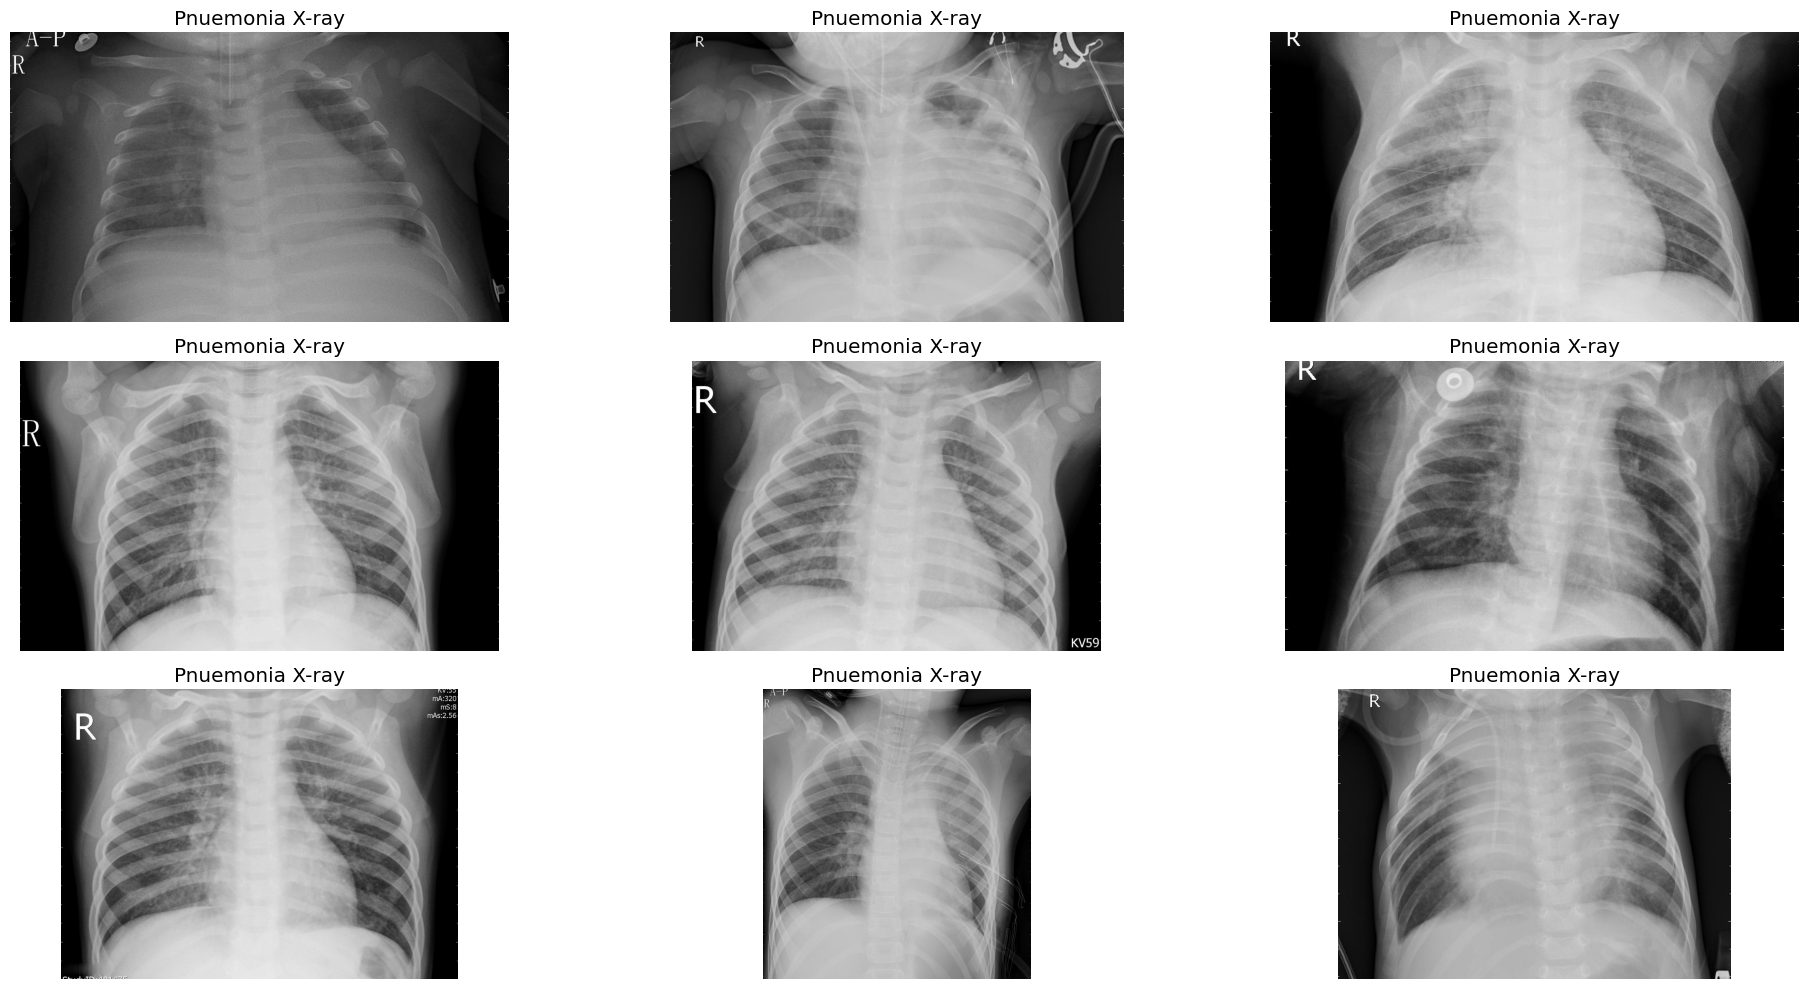

In [8]:
plt.figure(figsize=(20, 10))

for i in range(9):
  plt.subplot(3, 3, i+1)
  img = plt.imread(os.path.join(pnuemonia_dir, pnuemonia[i]))
  plt.imshow(img, cmap='gray')
  plt.axis('off')
  plt.title("Pnuemonia X-ray")

plt.tight_layout()



In [9]:
normal = os.listdir("/content/chest-xray-pneumonia/chest_xray/train/NORMAL")
normal_dir = "/content/chest-xray-pneumonia/chest_xray/train/NORMAL"


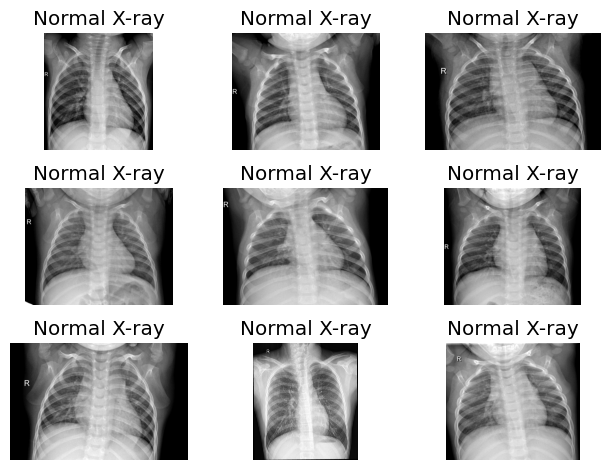

In [10]:
for i in range(9):
  plt.subplot(3, 3, i+1)
  img = plt.imread(os.path.join(normal_dir, normal[i]))
  plt.imshow(img, cmap='gray')
  plt.axis('off')
  plt.title("Normal X-ray")

plt.tight_layout()

['Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia'

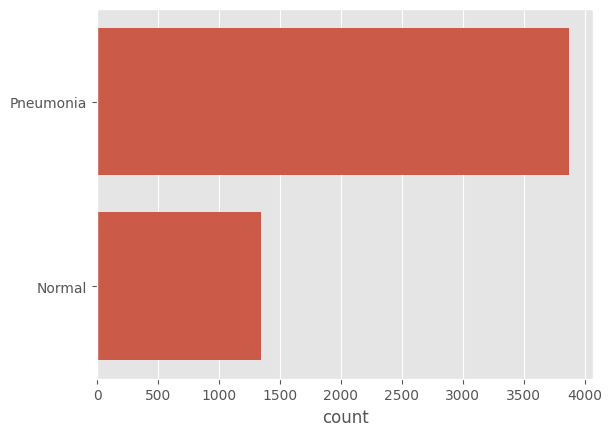

In [11]:
listx = []
for i in train:
  if(i[1]==0):
    listx.append("Pneumonia")
  else:
    listx.append("Normal")
sns.countplot(listx)

print(listx)

In [12]:
#Data Augmentation & Resizing

In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, Dropout
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [14]:
train_datagen = ImageDataGenerator(rescale= 1./255,
                                   horizontal_flip = 0.4,
                                   vertical_flip = 0.4,
                                   rotation_range = 40,
                                   shear_range = 0.2,
                                   width_shift_range=0.4,
                                   height_shift_range=0.4,
                                   fill_mode = "nearest")

valid_datagen = ImageDataGenerator(rescale=1./255)
test_dategen = ImageDataGenerator(rescale=1./255)

In [15]:
train_generator = train_datagen.flow_from_directory("/content/chest-xray-pneumonia/chest_xray/chest_xray/train",
                                                    batch_size = 32,
                                                    target_size = (128, 128),
                                                    class_mode = 'categorical',
                                                    shuffle = True,
                                                    seed = 42,
                                                    color_mode = 'rgb')

valid_generator = valid_datagen.flow_from_directory("/content/chest-xray-pneumonia/chest_xray/chest_xray/val",
                                                    batch_size = 32,
                                                    target_size = (128, 128),
                                                    class_mode = 'categorical',
                                                    shuffle = True,
                                                    seed = 42,
                                                    color_mode = 'rgb')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [16]:
class_labels = train_generator.class_indices

In [17]:
class_labels

{'NORMAL': 0, 'PNEUMONIA': 1}

In [18]:
class_name = {value:key for (key, value) in class_labels.items()}

In [19]:
class_name

{0: 'NORMAL', 1: 'PNEUMONIA'}

In [20]:
# VGG 19 CNN Architecture

In [21]:
base_model = VGG19(input_shape=(128, 128, 3),
                   include_top=False,
                   weights='imagenet')

for layer in base_model.layers:
  layer.trainable = False

x = base_model.output

flat = Flatten()(x)

class_1 = Dense(4608, activation = 'relu')(flat)

dropout = Dropout(0.2)(class_1)

class_2 = Dense(1152, activation='relu')(dropout)

output = Dense(2, activation='softmax')(class_2)

model_01 = Model(base_model.inputs, output)

model_01.summary()



80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 128, 128, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 128, 128, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 64, 64, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 32, 32, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 16, 16, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 63,089,602 (240.67 MB)

 Trainable params: 43,065,218 (164.28 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [22]:
filepath = "model.keras"
es = EarlyStopping(monitor="val_loss", verbose = 1, mode = "min", patience = 4)

cp = ModelCheckpoint(filepath, monitor = "val_loss", save_best_only=True, save_weights_only=False,mode="auto", save_freq="epoch")

lrr = ReduceLROnPlateau(monitor = "val_accuracy", patience=3, verbose = 1, factor=0.5, mil_lr = 0.0001)

sgd = SGD(learning_rate = 0.0001, decay = 1e-6, momentum = 0.1, nesterov = True)

model_01.compile(loss = 'categorical_crossentropy', optimizer = sgd, metrics=['accuracy'])



/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [23]:
# should run this for more epochs for better accuracy, but will take a lot of time, 10 minutes for 1 epochs

history_01 = model_01.fit(train_generator,
                          steps_per_epoch = 50,
                          epochs = 10,
                          callbacks = [es, cp, lrr],
                          validation_data = valid_generator
                          )

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


50/50 ━━━━━━━━━━━━━━━━━━━━ 41s 570ms/step - accuracy: 0.6245 - loss: 0.6661 - val_accuracy: 0.5000 - val_loss: 0.7674 - learning_rate: 1.0000e-04
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 22s 441ms/step - accuracy: 0.7637 - loss: 0.5439 - val_accuracy: 0.5000 - val_loss: 0.7924 - learning_rate: 1.0000e-04
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 22s 455ms/step - accuracy: 0.7367 - loss: 0.5582 - val_accuracy: 0.5000 - val_loss: 0.7473 - learning_rate: 1.0000e-04
Epoch 4/10
13/50 ━━━━━━━━━━━━━━━━━━━━ 5s 136ms/step - accuracy: 0.6887 - loss: 0.6011

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 4: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7198 - loss: 0.5728 - val_accuracy: 0.5000 - val_loss: 0.7554 - learning_rate: 1.0000e-04
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 23s 405ms/step - accuracy: 0.7286 - loss: 0.5472 - val_accuracy: 0.5000 - val_loss: 0.7485 - learning_rate: 5.0000e-05
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 24s 486ms/step - accuracy: 0.7670 - loss: 0.5151 - val_accuracy: 0.5000 - val_loss: 0.7333 - learning_rate: 5.0000e-05
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step - accuracy: 0.7532 - loss: 0.5088
Epoch 7: ReduceLROnPlateau reducing learning rate to 2.499999936844688e-05.
50/50 ━━━━━━━━━━━━━━━━━━━━ 24s 487ms/step - accuracy: 0.7532 - loss: 0.5090 - val_accuracy: 0.5000 - val_loss: 0.7290 - learning_rate: 5.0000e-05
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.7834 - loss: 0.4869 - val_accuracy: 0.5000 - val_loss: 0.7363 - learning_rate: 2.5000e-05
Ep

In [24]:
if not os.path.isdir('model_weights/'):
  os.mkdir("model_weights/")

model_01.save(filepath = "model_weights/vgg19_model_01.h5", overwrite=True)

In [25]:
test_generator = test_dategen.flow_from_directory("/content/chest-xray-pneumonia/chest_xray/chest_xray/test",
                                                    batch_size = 32,
                                                    target_size = (128, 128),
                                                    class_mode = 'categorical',
                                                    shuffle = True,
                                                    seed = 42,
                                                    color_mode = 'rgb')

Found 624 images belonging to 2 classes.


In [26]:
model_01.load_weights("model_weights/vgg19_model_01.h5")

vgg_val_eval_01 = model_01.evaluate(valid_generator)

vagg_test_eval_01 = model_01.evaluate(test_generator)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step - accuracy: 0.5000 - loss: 0.7199
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 248ms/step - accuracy: 0.6141 - loss: 0.6427


In [27]:
print(f"Validatoin loss: {vgg_val_eval_01[0]}")
print(f"Validation Accuracy: {vgg_val_eval_01[1]}")
print(f"Test Loss: {vagg_test_eval_01[0]}")
print(f"Test Accuracy: {vagg_test_eval_01[1]}")

Validatoin loss: 0.7198610305786133
Validation Accuracy: 0.5
Test Loss: 0.6337711215019226
Test Accuracy: 0.625


In [28]:
import numpy as np

In [29]:
arr = [224, 20, 30, 40]



In [30]:
arr

[224, 20, 30, 40]

In [31]:
arr = np.array(arr)

In [32]:
arr

array([224,  20,  30,  40])

In [33]:
arr/255.0

array([0.87843137, 0.07843137, 0.11764706, 0.15686275])

In [34]:
from IPython.display import Markdown


markdown_text = """

"""

In [35]:
import requests

In [36]:
request = {
  "files": {
      "file": [[1, 2, 3], [3,4,5]]
  }
}

In [37]:
request["files"]['file']

[[1, 2, 3], [3, 4, 5]]

In [38]:
import os
os.path.dirname("/content/sample_data/anscombe.json")

'/content/sample_data'

In [39]:
actions = ['A', 'B', 'C']
label_map = {label: num for num, label in enumerate(actions)}

In [40]:
label_map

{'A': 0, 'B': 1, 'C': 2}

Video ---> 1 Frame/Image ---> Landmarkings = [1,3,4,5,5,6] ---> Model (Models only understand numbers) ---> Predictions (A/B/C)

In [41]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import TensorBoard

In [42]:
import numpy as np

actions = np.array(['A', 'B', 'C'])

# Initialize a Sequential model
model = Sequential()


#Add LSTM layers with specified configurations
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30, 63)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=True, activation='relu'))

# Add dense layers with specified configurations.
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation = 'relu'))

# Add the final output layer with softmax activaation for multiclass classification
model.add(Dense(actions.shape[0], activation='softmax'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 30, 64)              │          32,768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 30, 128)             │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 30, 64)              │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 30, 64)              │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 30, 32)              │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 30, 3)               │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 187,331 (731.76 KB)

 Trainable params: 187,331 (731.76 KB)

 Non-trainable params: 0 (0.00 B)